## Model v0.1

In [38]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# import the train test split
from sklearn.model_selection import train_test_split

In [39]:
# List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

In [40]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/Shantanu/Downloads


In [41]:
# Uses the input file generated from preprocessing
input_file ='input_model.csv'

input_data = pd.read_csv(input_file)

# Making all column names UPPER CASE --> inline with the weather data file
input_data.columns = map(str.upper, input_data.columns)


# rename UNNAMED:0 to INDEX
input_data.rename(columns={'UNNAMED: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
input_data = input_data.drop('UNNAMED: 0.1', axis=1)

input_data.head()

# List of column names
col_names = list(input_data)

# List all column types
#input_data.dtypes

In [42]:
# Preprocessing

print("Shape of Original data: {}".format(input_data.shape) + "\n")

input_variables = input_data.iloc[:,4:]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")

price = input_data.iloc[:,26]

Shape of Original data: (192, 27)

Variables: Index(['TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW',
       'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG',
       'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG',
       'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_FOG',
       'NUM_DAYS_THNDRSTRM', 'PRICE'],
      dtype='object')

Shape of variable data: (192, 23)



In [43]:
print(input_data.columns)

Index(['INDEX', 'STATE', 'YEAR', 'MONTH', 'TMP_HIGH', 'TMP_AVG', 'TMP_LOW',
       'DP_HIGH', 'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG', 'HUM_LOW',
       'SEALVL_HIGH', 'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG',
       'VIS_LOW', 'WIND_HIGH', 'WIND_AVG', 'PRECIP', 'NUMDAY_RAIN',
       'NUM_DAYS_SNOW', 'NUM_DAYS_FOG', 'NUM_DAYS_THNDRSTRM', 'PRICE'],
      dtype='object')


# Linear Regression

# Visualizing the important characterstics

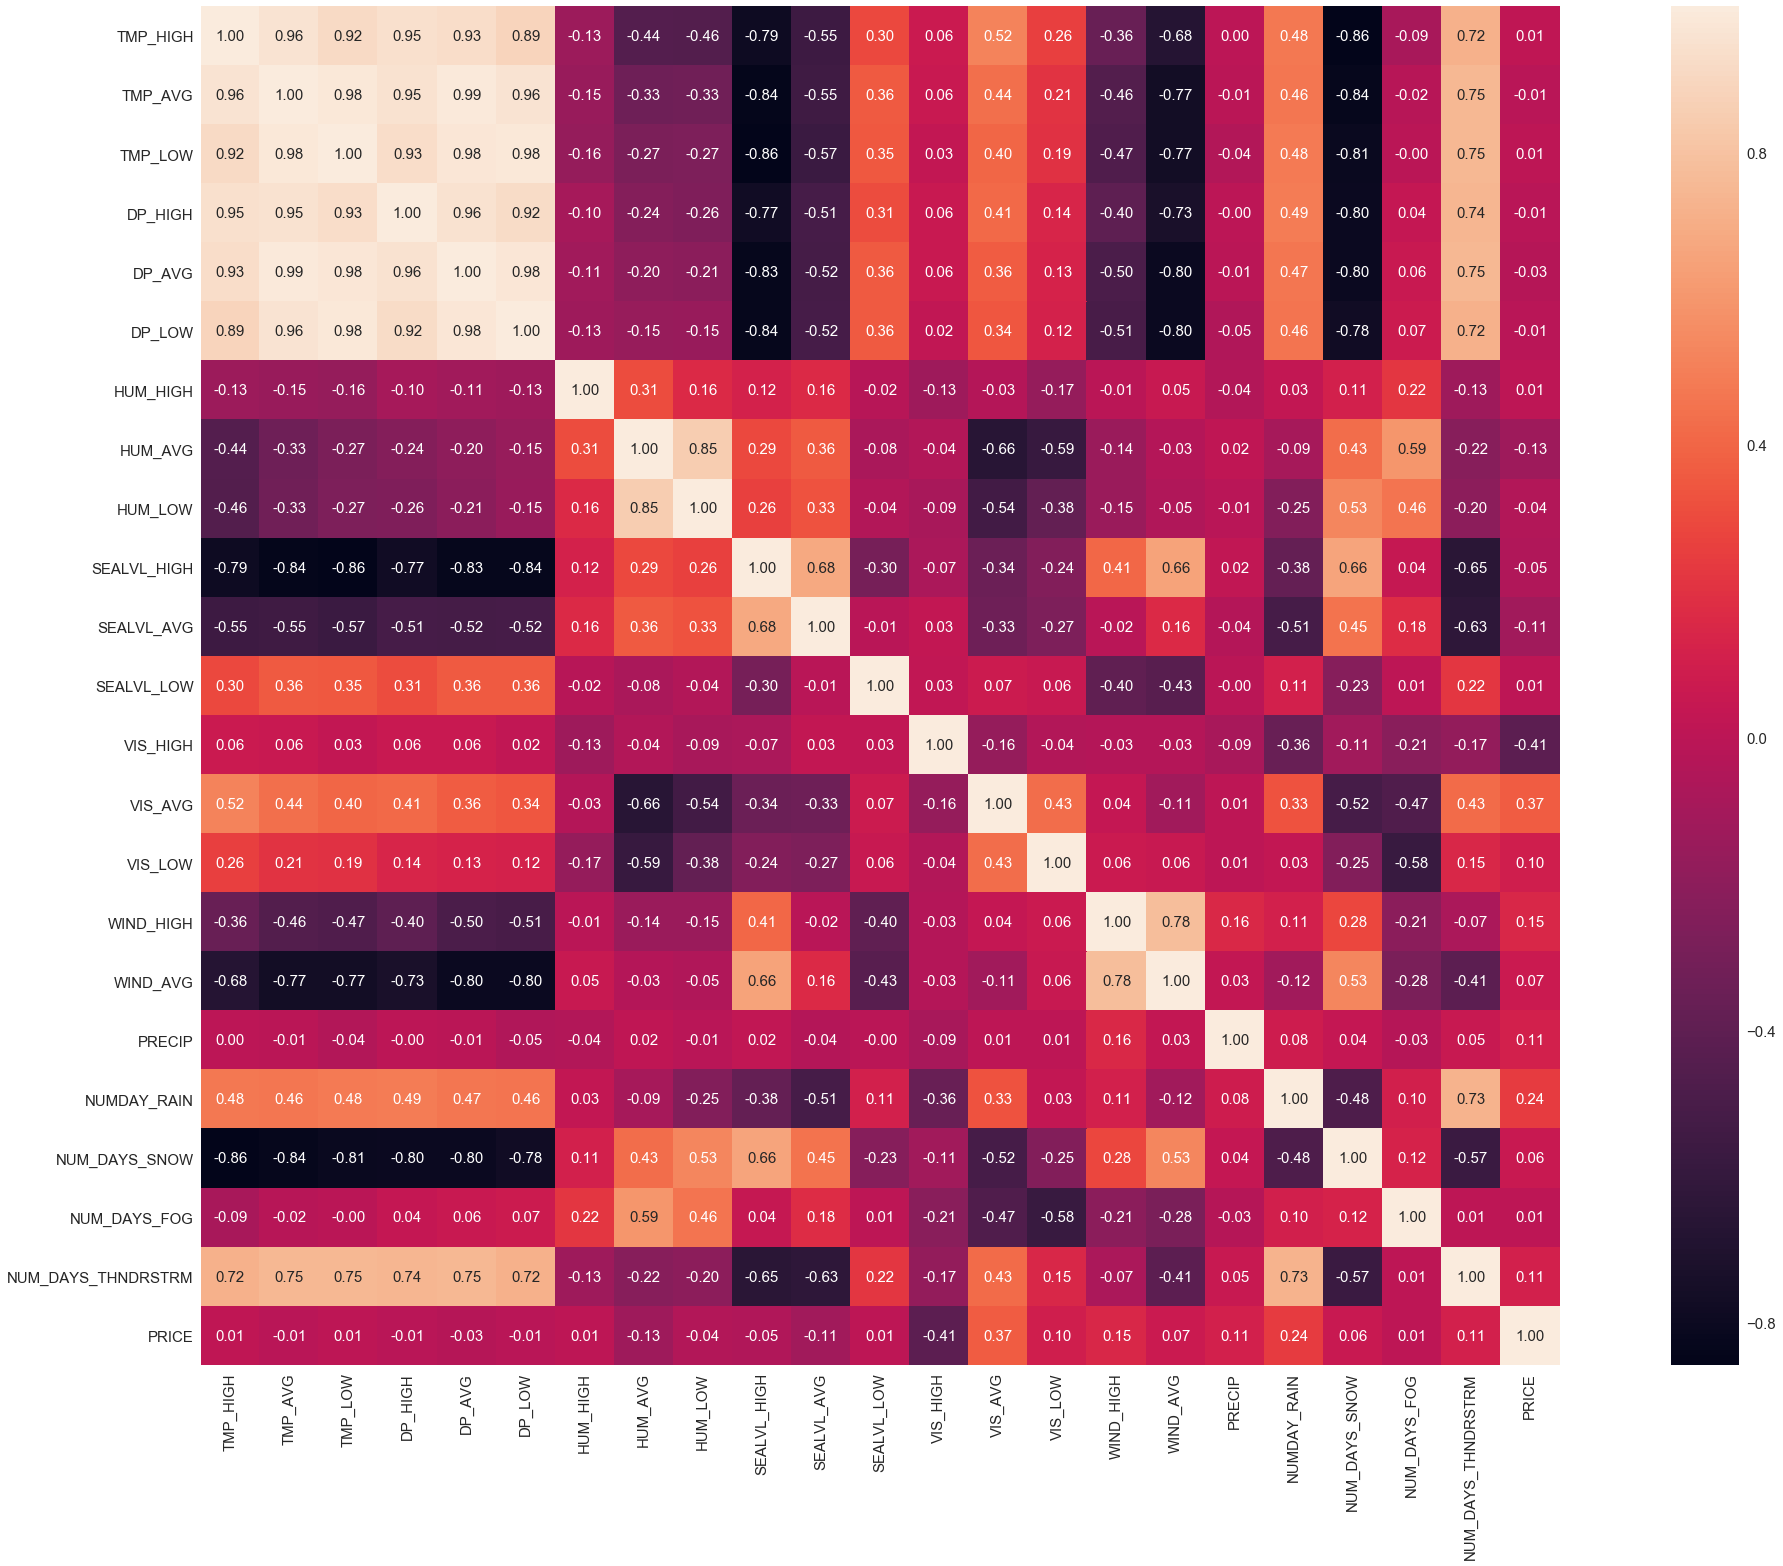

In [44]:
# Plot the correlation matrix 
correlation_matrix = np.corrcoef(input_variables.values.T)
heat_map_column_names = col_names = list(input_variables)
sns.set(font_scale = 1.5)
plt.figure(figsize = (40,25))
hm = sns.heatmap(correlation_matrix,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=heat_map_column_names,
    xticklabels=heat_map_column_names)
plt.show()

In [45]:
# Splitting Data into Training and Test
X_train, X_test, y_train, y_test = train_test_split(input_variables.iloc[:,0:22], price, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(153, 22) (153,)
(39, 22) (39,)


## Simple Linear Regression

In [46]:
# regression libraries
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_{}: ".format(lr.coef_))
print("\n" + "lr_intercept_{}".format(lr.intercept_))

lr.coef_[ 0.03938976 -0.09943254  0.08670653 -0.02299039  0.08852645 -0.08666995
 -0.11782578  0.02205814  0.04116832 -2.95317019 -1.6269521   0.56015192
 -1.50310158  1.76015547 -0.15142043  0.06581295 -0.04759631  0.0101935
  0.04562554  0.04473697  0.08507118 -0.09566936]: 

lr_intercept_131.34976512112485


In [47]:
# Train and Test Performance
print("Training set score: {:2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:2f}".format(lr.score(X_test,y_test)))

# Store Result and Model Name
model_results.append(lr.score(X_test,y_test))
model_name.append("Linear")

Training set score: 0.445507
Test set score: 0.225677


## Ridge Regression

In [48]:
# Coefficients should be close to zero

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Store Result and Model Name
model_results.append(ridge.score(X_test,y_test))
model_name.append("Ridge")

Training set score: 0.44
Test set score: 0.29


In [49]:
# Try with some handpicked alpha values
# Note: Higher alpha decerease training test performance but increases generalization

ridge_01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training_ridge_0.1 set score: {:.2f}".format(ridge_01.score(X_train, y_train)))
print("Test_ridge_0.1 set score: {:.2f}".format(ridge_01.score(X_test, y_test)))
print("\n")

# Store Result and Model Name
model_results.append(ridge_01.score(X_test,y_test))
model_name.append("Ridge_0.1")

ridge_10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training_ridge_10 set score: {:.2f}".format(ridge_10.score(X_train, y_train)))
print("Test_ridge_10 set score: {:.2f}".format(ridge_10.score(X_test, y_test)))

# Store Result and Model Name
model_results.append(ridge_10.score(X_test,y_test))
model_name.append("Ridge_10")

Training_ridge_0.1 set score: 0.45
Test_ridge_0.1 set score: 0.24


Training_ridge_10 set score: 0.39
Test_ridge_10 set score: 0.33


## Lasso Regression

In [50]:
# we have large number of features and only a few of them looked important
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

# Store Result and Model Name
model_results.append(lasso.score(X_test,y_test))
model_name.append("Lasso")

Training set score: 0.09
Test set score: 0.05
Number of features used: 4


In [51]:
# Setting alpha too low will remove the effect of regularization

lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))

# Store Result and Model Name
model_results.append(lasso0001.score(X_test,y_test))
model_name.append("Lasso_0.001")

Training set score: 0.45
Test set score: 0.23
Number of features used: 22


## Elastic Net

In [52]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.1, l1_ratio=0.7,max_iter = 100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(enet.score(X_train, y_train)))
print("Test set score: {:.2f}".format(enet.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(enet.coef_ != 0)))

# Store Result and Model Name
model_results.append(enet.score(X_test,y_test))
model_name.append("Elastic Net")

Training set score: 0.34
Test set score: 0.33
Number of features used: 15


In [53]:

# # Fitting Multiple Linear Regression to the Training set
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = regressor.predict(X_test)

# from sklearn.metrics import r2_score
# r2_score(y_test,y_pred)
# print("Accuracy: %f"%r2_score(y_test,y_pred))

# # Store Result and Model Name
# model_results.append(r2_score(y_test,y_pred))
# model_name.append("MLR")


## Decision Tree

In [54]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Decision Tree: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("Decision Tree")

Accuracy of Decision Tree: -0.155210


## Random Forest

In [55]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Random Forest_10: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("Random Forest_10")

Accuracy of Random Forest_10: 0.617773


In [56]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Random Forest_100: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("Random Forest_100")

Accuracy of Random Forest_100: 0.677308


In [57]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Random Forrest_300: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("Random Forest_300")

Accuracy of Random Forrest_300: 0.664055


### Plot Results of regression models

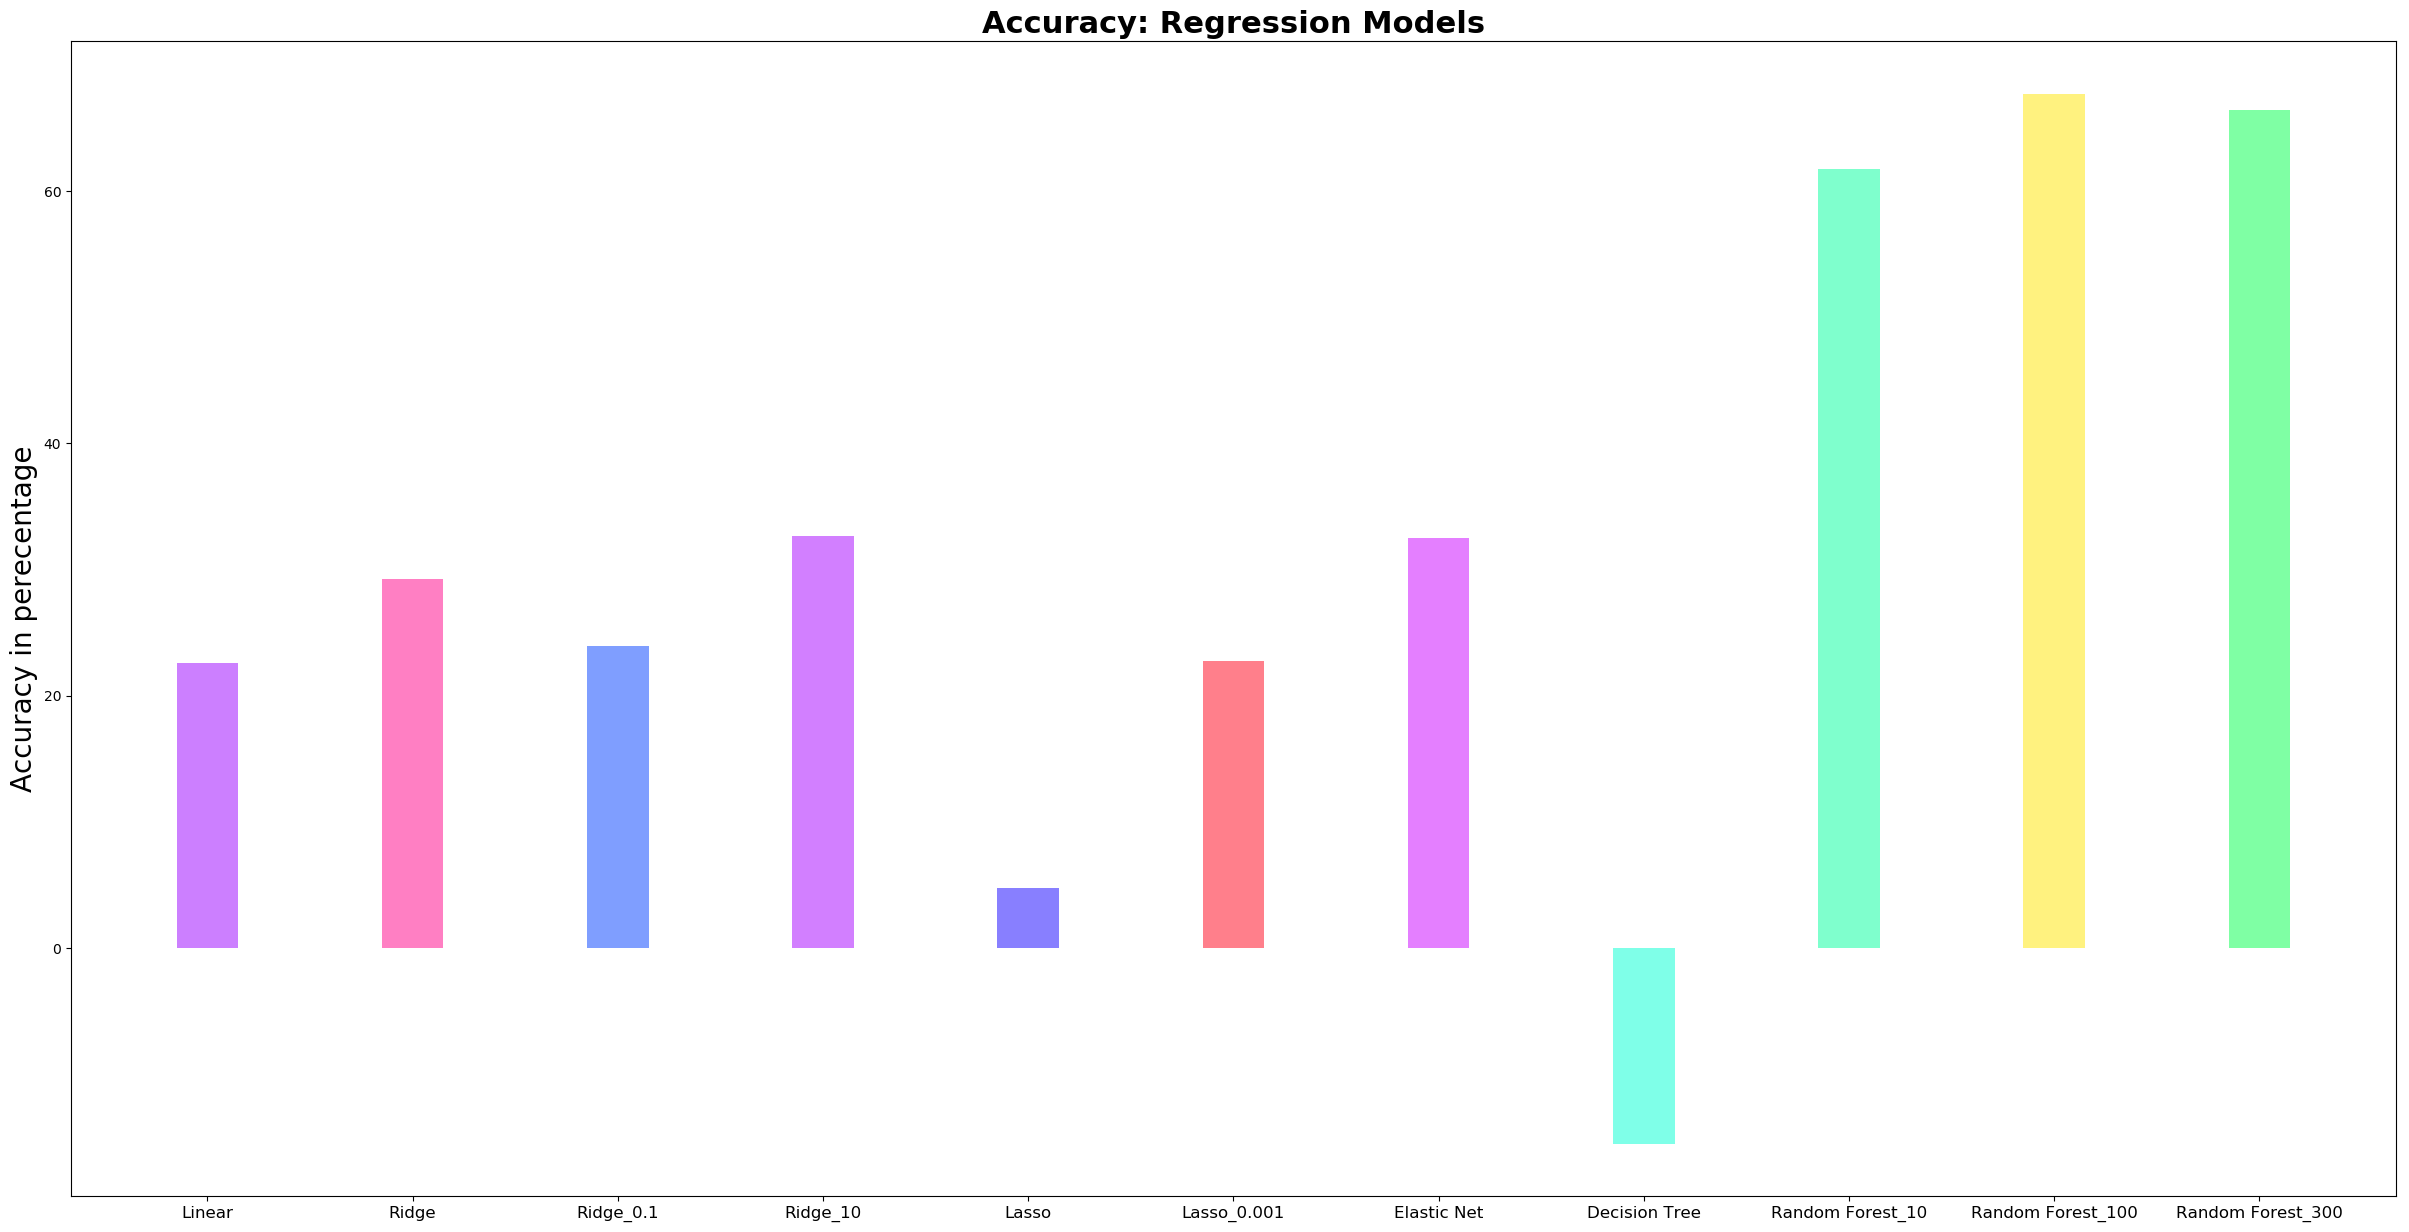

In [59]:
from matplotlib import cm
import random

# Give each bar separate color
color_code_vector = random.sample(range(1, 100), len(model_name))
reg_color_code_vector = map(lambda x: x/max(color_code_vector), color_code_vector)
reg_color_code_vector = list(reg_color_code_vector)
reg_color_code_vector
colors = cm.hsv(reg_color_code_vector)

# Expressing accuracy in percentage
model_results_percentage = list(map(lambda x: x*100, model_results))

y_pos = np.arange(len(model_name))

plt.rcdefaults() # white background, gets rid of gray
plt.figure(figsize = (30,15))
plt.bar(y_pos, model_results_percentage, align='center', alpha=0.5, width=0.3, color = colors)
plt.xticks(y_pos, model_name, fontsize = 12)
plt.ylabel('Accuracy in perecentage', fontsize=20)
plt.title('Accuracy: Regression Models', fontsize=22, fontweight='bold')
plt.show()